# Lecture 1 Notes
## Monday, March 30, 2020
Annie Bryan

#### What is a model?

Mathematical / computational description of a *small subpiece* of the world

- isolate effects of interest
- start simple, understand behavior
- make more complicated (add additional effects), understand how results change
- repeat

#### Assumptions:

- Suppose no influence from outside
- No births or deaths
- Infection is transmitted by proximity
- Stay infected once infected

Choose a model in <b>discrete time</b> n = days \
$I_n$ is the number of <b>infectious</b> people on the nth day \
$S_n$ is the number of <b>susceptible</b> people on the nth day

Initial Conditions: $I_0$ = 1, $S_0$ = N-1 \
Hypotheses on dynamics of infection: \
Specify how $I_{n+1}$ depends on $I_0$, ..., $I_n$ \
- $I_{n+1}$ = $f(I_n)$ <b>deterministic model</b>
- $f(I_n)$ + $\psi$ <b>stochastic model</b>
The output of the model will be a <b>time series</b>

Goal: Obtain time series that "mimics" real-world data \
Possible goal: Identify what effects must be included in model and which ones may not be relevant

### Simple model of infection
Each individual infects $c$ new people each day \
$I_{n+1} = \lambda I_n$ where $\lambda := c+1$ is the **growth rate** \
$I_0 = 1$

In [7]:
I₀ = 1 # \_0 <tab>

1

In [10]:
# avg # of people that each individual infects per day
c = 0.01 

0.01

In [11]:
λ = 1 + c # \lambda <tab>

1.01

In [12]:
I₁ = λ * I₀

1.01

In [14]:
I₂ = λ * I₁

1.0201

#### Automate this in an array

In [20]:
T = 100 # final time
I = zeros(T) # creates array of zeros of length 100

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Could say `I = zeros(Int64, T)` if we wanted array of ints

In [23]:
I[1] = I₀ # could use OffsetArrays.jl -- enables arbitrary indexing

1

In [27]:
for n in 1:T-1
    I[n+1] = λ * I[n]
end

In [25]:
I

100-element Array{Float64,1}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609
 1.1046221254112045
 1.1156683466653166
 1.1268250301319698
 ⋮
 2.40038493740661
 2.424388786780676
 2.4486326746484828
 2.4731190013949678
 2.4978501914089173
 2.5228286933230066
 2.5480569802562365
 2.573537550058799
 2.599272925559387
 2.6252656548149806
 2.6515183113631307
 2.678033494476762

In [28]:
using Plots

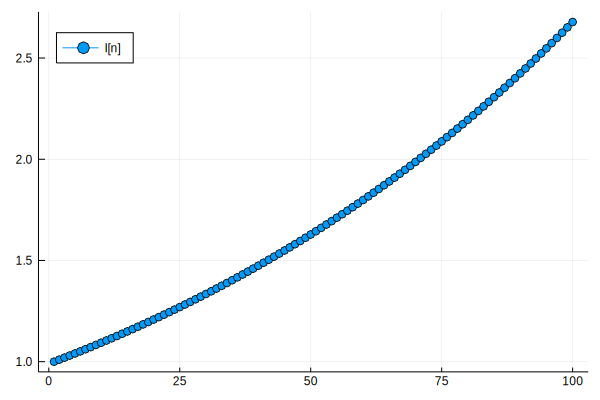

In [30]:
plot(I, m=:o, label="I[n]", leg=:topleft)

#### Functions

In [36]:
function run_infection(T, I₀, c)
    λ = c + 1
    I = zeros(T)
    I[1] = I₀
    for n in 1:T-1
        I[n+1] = λ * I[n]
    end
    
    return I
end

run_infection (generic function with 1 method)

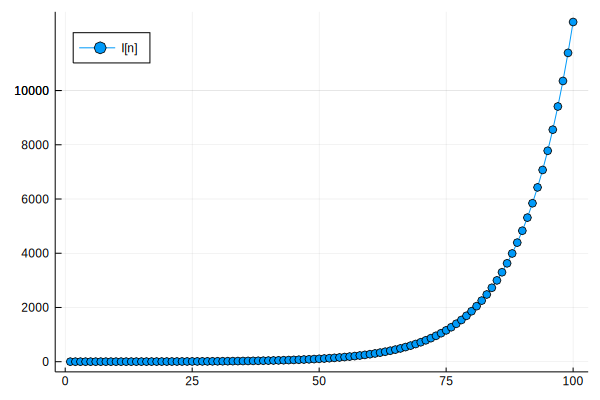

In [46]:
I = run_infection(100, 1, 0.1)
plot(I, m=:o, label="I[n]", leg=:topleft)

In [42]:
using Interact

In [51]:
max_y = I[100]

@manipulate for T in 1:100
    I = run_infection(T, 1, 0.1)
    plot(I, m=:o, label="I[n]", leg=:topleft)
    
    xlims!(0,100)
    ylims!(0, max_y)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["T"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/anniebryan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/anniebryan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/anniebryan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/anniebryan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/anniebryan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000109d29b10, Task (runnable) @0x0000000109d29b10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",

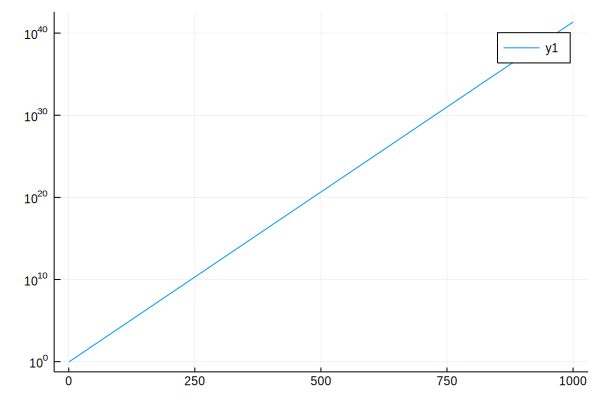

In [52]:
plot(run_infection(1000, 1, 0.1), yscale=:log10)

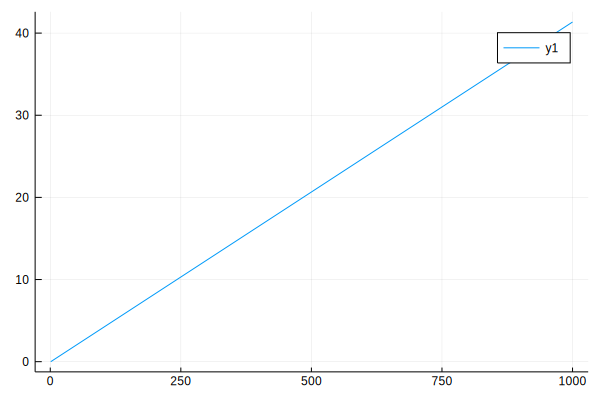

In [54]:
I = run_infection(1000, 1, 0.1)
plot(log10.(I)) # same result as above

$\log{I_n} = an + b$ \
$I_n = \exp{an + b} = C e^{an}$ \
Solve $I_{n+1} = \lambda I_n$: \
$\log{(\lambda^n)} = n\log{(\lambda)}$ \
$I_n = \lambda^n I_0$

### Logistic growth
Exponential growth is unrealistic because it assumes that there are always more people to infect (this is wrong -- there is a finite population)

**Original model:** $I_{n+1} = I_n (1+c)$

**New model:** Can only affect uninfected people

Each individual will be in contact with a fraction $\alpha$ of the population. At each contact there will be a probability $p$ that you infect them.

Number of contacts = $\alpha N$

Number of people you infect that aren't already infected = $p \alpha S_n$

$I_{n+1} = I_n(1 + p \alpha S_n)$

$S_n = N - I_n$ is the number of susceptible people

$I_{n+1} = I_n\left(1 + p \alpha (N-I_n)\right)$

In [60]:
function run_logistic_model(T, I₀, p, α, N)
    I = zeros(T)
    S = zeros(T)
    I[1] = I₀
    for n in 1:T-1
        S[n] = N - I[n]
        I[n+1] = I[n] * (1 + p * α * S[n])
    end
    
    return I
end

run_logistic_model (generic function with 1 method)

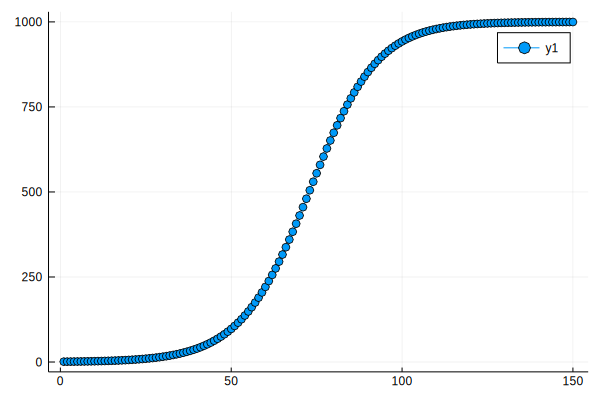

In [64]:
I = run_logistic_model(150, 1, 0.01, 0.01, 1000)
plot(I, m=:o)

This is a **sigmoid curve**

All models are wrong, but some models are useful \
All data is wrong, but some data is useful

### More realism: Heterogeneity of individuals
Idea: Instead of modelling global population, model each individual

**Patch model:** Local patches where population is well-mixed

**Network model:** Links between nodes, each node is a person and the infection can travel along links

Making exponential growth **random:**
$I_{n+1} = \lambda_n I_n$ -- growth rate changes in time

In [75]:
function run_random(T, I₀, c_avg)
    I = zeros(T)
    I[1] = I₀
    for n in 1:T-1
        c = c_avg + 0.1*randn()
        λ = c + 1
        I[n+1] = I[n]*λ
    end
    
    return I
end

run_random (generic function with 2 methods)

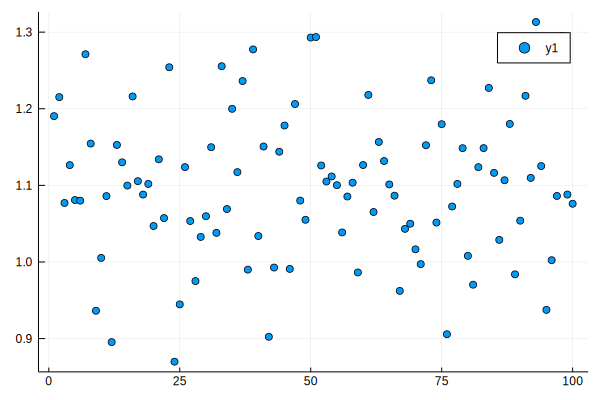

In [76]:
c_avg = 1.1

cs = [c_avg + 0.1*randn() for _ in 1:100]
scatter(cs)

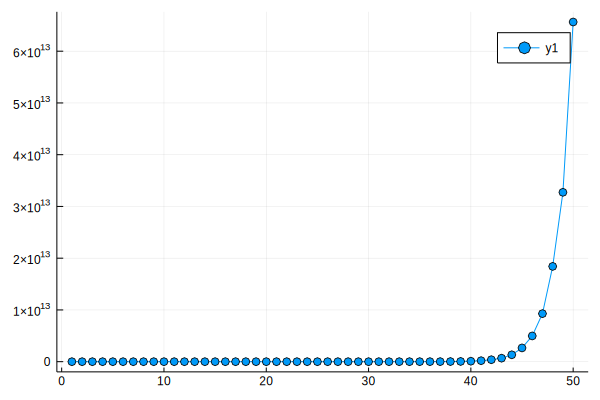

In [77]:
I = run_random(50, 1, 0.9)
plot(I, m=:o)